In [1]:
# https://nominatim.openstreetmap.org/
# http://polygons.openstreetmap.fr/index.py

In [2]:
from helper import *

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [3]:
outline = gpd.read_file("random.geojson")

In [4]:
key = "11f6ec68-179b-43b8-8996-70305cee0942"
o3 = S5PL2CWCSInput('O3', resx='1000m', resy='1000m', maxcc=1,instance_id=key)
so2 = S5PL2CWCSInput('SO2', resx='1000m', resy='1000m', maxcc=0.5,instance_id=key)
no2 = S5PL2CWCSInput('NO2', resx='1000m', resy='1000m', maxcc=0.5,instance_id=key)
co = S5PL2CWCSInput('CO', resx='1000m', resy='1000m', maxcc=0.5,instance_id=key)
aero = S5PL2CWCSInput('AER_AI_354_388', resx='1000m', resy='1000m', maxcc=0.5,instance_id=key)

In [5]:
components = ["O3", "SO2", "NO2", "CO", "AER_AI_354_388"]

In [6]:
time_interval = ['2019-12-01','2019-12-09']

In [7]:
workflow = LinearWorkflow(o3,so2,no2,co,aero)

In [8]:
outline_bbox = get_bbox(outline)

In [9]:
result = workflow.execute({o3: {'bbox': outline_bbox, 'time_interval': time_interval}})
patch = list(result.values())[-1]
patch.save('patch/patches-random-data', overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

In [10]:
patch

EOPatch(
  data: {
    AER_AI_354_388: numpy.ndarray(shape=(12, 369, 427, 1), dtype=float32)
    CO: numpy.ndarray(shape=(12, 369, 427, 1), dtype=float32)
    NO2: numpy.ndarray(shape=(12, 369, 427, 1), dtype=float32)
    O3: numpy.ndarray(shape=(81, 369, 427, 1), dtype=float32)
    SO2: numpy.ndarray(shape=(12, 369, 427, 1), dtype=float32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(81, 369, 427, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 1
    service_type: 'wcs'
    size_x: '1000m'
    size_y: '1000m'
    time_difference: datetime.timedelta(-1, 86399)
    time_interval: ['2019-12-01', '2019-12-09']
  }
  bbox: BBox(((75.05459245, 32.00185932), (79.69232905000001, 36.00842628)), crs=EPSG:4326)
  timestamp: [datetime.datetime(2019, 12, 1, 5, 38, 47), ..., datetime.datetime(2019, 12, 7, 5, 59, 31)], length=81
)

In [12]:
aqi_for_patch(patch)

IndexError: index 12 is out of bounds for axis 0 with size 12

In [13]:
aqi_for_patch_for_date(patch,-1)

Ozone Concentration is GoodSulfur dioxide Concentration is GoodNitrogen dioxide Concentration is GoodCarbon monoxide Concentration is GoodAerosol Concentration is Moderate


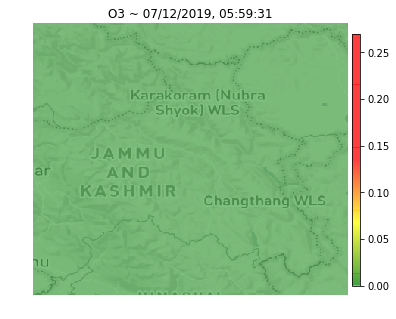

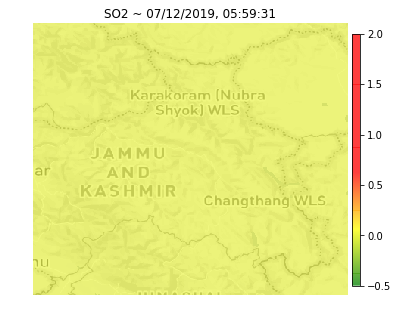

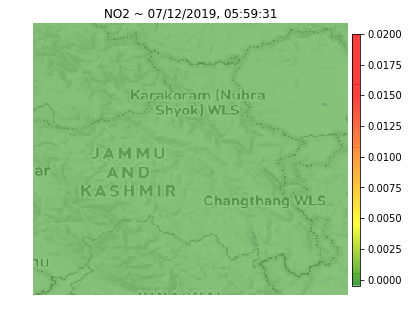

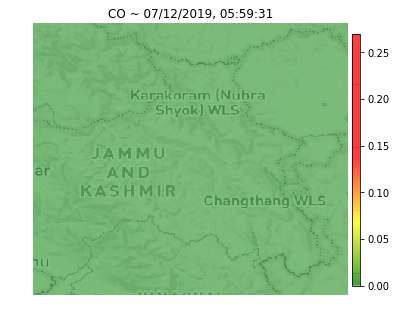

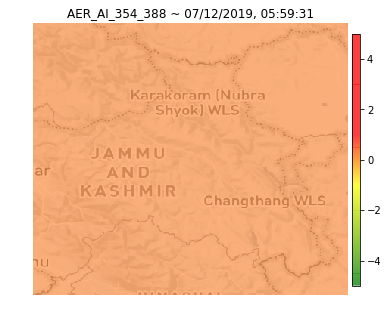

In [14]:
for i in components:
    plot_with_data(patch,i,outline_bbox,-1,5)

In [41]:
#create_gif_for_patch(patch[current_city],outline_bbox,current_city)